In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Template matching

Here's a fun way to solve task 6 of lab 1.

In [44]:
im = cv2.imread('./test_images/task6_helipad.png',0)

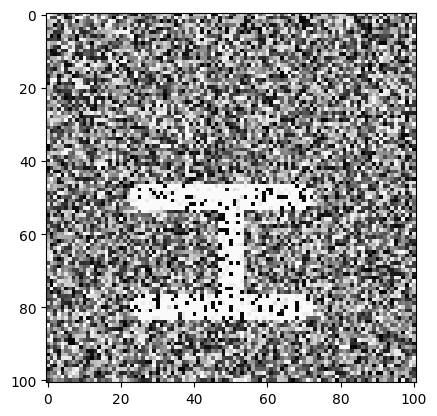

In [47]:
plt.imshow(im,cmap='gray')
plt.show()

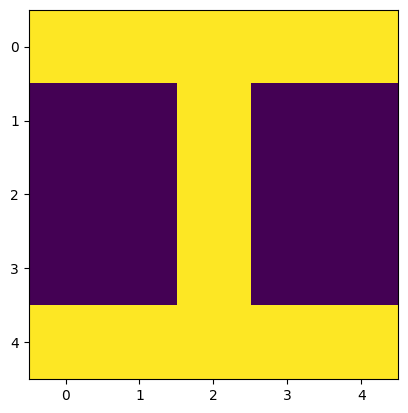

In [49]:
# Make a filter that looks like what the helipad we want to find
template = np.zeros((5,5),dtype=np.uint8)
template[0,:] = 255
template[-1,:] = 255
template[:,2] = 255

plt.imshow(template)
plt.show()

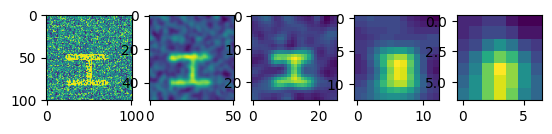

In [50]:
# Make an image pyramid - remember this simulates our image being viewed at multiple scales
# We do this by repeatedly downsampling then bluring
im_s = [im.copy()]
for i in range(5):
    im_s.append(cv2.GaussianBlur(cv2.pyrDown(im_s[i]),(5,5,),0))
    plt.subplot(1,5,i+1)
    plt.imshow(im_s[i])
plt.show()

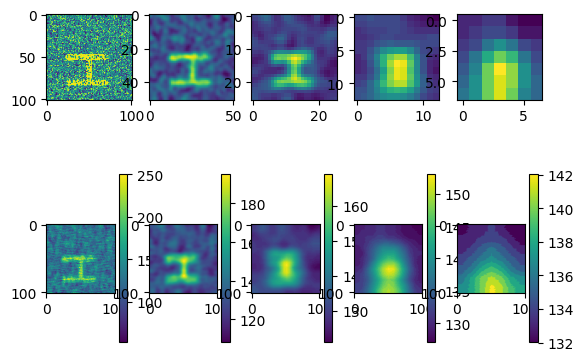

In [51]:
# Let's convolve each layer of our pyramid with the template
im_s = [im.copy()]
res=[]
for i in range(5):
    im_s.append(cv2.GaussianBlur(cv2.pyrDown(im_s[i]),(5,5,),0))
    res.append(cv2.resize(cv2.filter2D(im_s[i],-1,template/np.sum(template)),im.shape))
    plt.subplot(2,5,i+1)
    plt.imshow(im_s[i])
    plt.subplot(2,5,i+6)
    plt.imshow(res[i])
    plt.colorbar()
plt.show()

63.6 49.2


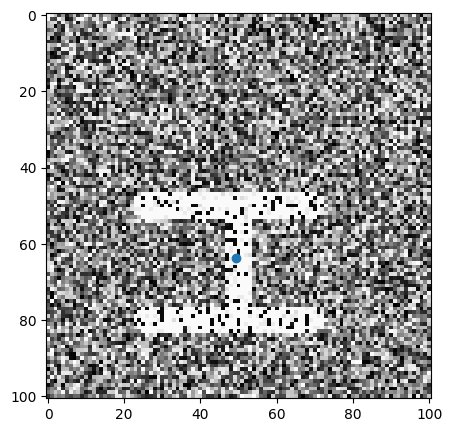

In [53]:
# Let's average the location of the maximum response
ave_x = 0 
ave_y = 0
for i in range(5):
    cx,cy = np.where(res[i]==np.max(res[i]))
    ave_x += cx[0]
    ave_y += cy[0]
    
print(ave_x/5,ave_y/5)
plt.figure(figsize=(15,5))
plt.imshow(im,cmap='gray')
plt.plot(ave_y/5,ave_x/5,'o')
plt.show()
    

Oh look, we found our helipad.